###### exteend the training dataset to cover release_8 ,release_4 which they are parallel

## Pre-processing ##
Now that everything is set up, we want to load our data, but first we need to load a couple of useful python packages:


In [44]:
from sys import stdout

import random
import numpy as np

import matplotlib.pyplot as plt

from PIL import Image

import tensorflow as tf
from tensorflow import keras

# load and plot dataset from segments.ai

In [45]:
from segments import SegmentsClient, SegmentsDataset
from segments.utils import export_dataset
from segments.utils import get_semantic_bitmap

# Initialize a SegmentsDataset from the release file
client = SegmentsClient('1ab6d79f821642127c1ab3b3afc69efdd8314566')
dataset_name_8 = 'aydakhorasani/line_8_2'
dataset_name_4 = 'aydakhorasani/inline_4_3'

# Get a list of image URLs

release_8 = client.get_release(dataset_name_8, 'Cluster_line_8') # Alternatively: release = 'flowers-v1.0.json'
release_4 = client.get_release(dataset_name_4, 'line_4_cluster') # Alternatively: release = 'flowers-v1.0.json'
# release_10 = client.get_release(dataset_name_10, 'v0.10.fault.new') # Alternatively: release = 'flowers-v1.0.json'

Initialized successfully.


Initializing dataset...
Preloading all samples. This may take a while...


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 45.61it/s]

Initialized dataset with 1 images.


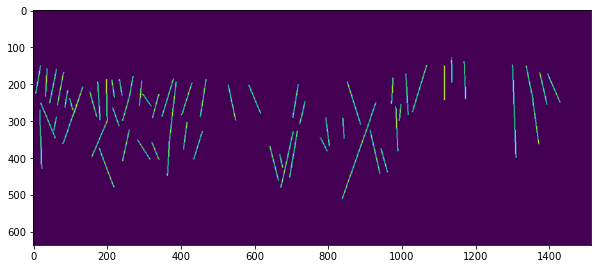

In [186]:
dataset = SegmentsDataset(release_4)
for sample in dataset:
    label = get_semantic_bitmap(sample['segmentation_bitmap'], sample['annotations'])
plt.figure(figsize=(10,10)) 
label = np.stack([label==v for v in np.unique(label)], axis=-1)
plt.imshow(label[:,:,1])

In [14]:
label.shape

(688, 1505, 7)

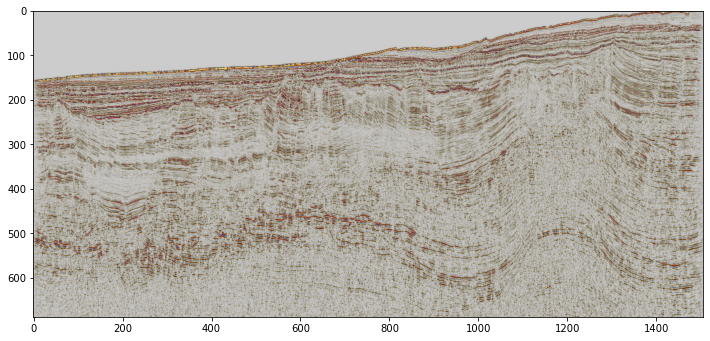

In [5]:
a = sample['image']
plt.figure(figsize=(12,12))
plt.imshow(np.array(a))

Initializing dataset...
Preloading all samples. This may take a while...


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 45.64it/s]

Initialized dataset with 1 images.


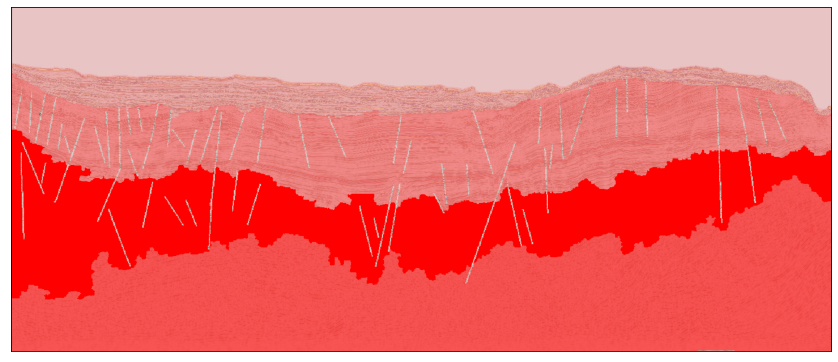

In [189]:
# from google.colab import widgets

def load_data_label(release):
    dataset = SegmentsDataset(release)
    for sample in dataset:
        label = get_semantic_bitmap(sample['segmentation_bitmap'], sample['annotations'])
        data = np.asarray(sample['image']) / 255.
        #converting to grayscale
#         data = 0.2989*data[:,:,0] + 0.5870*data[:,:,1] + 0.1140*data[:,:,2]
#         data = Image.open(data_dir + sample['file_name'])
    label = np.asarray(label)
    return data, label


def plot_overlay(image, label, i):
    (tmax, xmax) = np.shape(label)

    label_rgb = np.zeros((tmax,xmax,4), 'uint8')
    label_rgb[:,:,0] = 255
    label_rgb[:,:,1] = 255 - 255*label/np.max(label)
    label_rgb[:,:,2] = 255 - 255*label/np.max(label)
    label_rgb[:,:,3] = 255*label/np.max(label)   
    
    img = Image.fromarray(label_rgb, mode='RGBA')
    
#     img_gray = 0.2989*image[:,:,0] + 0.5870*image[:,:,1] + 0.1140*image[:,:,2]
    image_rgb = np.zeros((tmax,xmax,4), 'uint8')    
    image_rgb[:,:,0] = 255*image[:,:,0]
    image_rgb[:,:,1] = 255*image[:,:,1]
    image_rgb[:,:,2] = 255*image[:,:,2]
#     image_rgb[:,:,0:3] = 255. * image
    image_rgb[:,:,3] = 255
    
    background = Image.fromarray(image_rgb, mode='RGBA') 
    background.paste(img, (0, 0), img)

#     background = Image.fromarray(image_rgb, mode='RGBA') 
#     print(image.shape)
#     print(label.shape)
#     background.paste(label, (0, 0), label)

    plt.subplot(1,3,i+1).imshow(background)
    plt.xticks([])
    plt.yticks([])



release = [release_4]
plt.figure(figsize=(50,50))
for i, rel in enumerate(release):
   
    data, label = load_data_label(rel)
    plot_overlay(data, label, i)
    plt.xticks([])
    plt.yticks([])

make training and validation dataset, (patchify, size of patch, ...),
#  window size  is  128,RGB,
# I used release_8,  for  both train and validation

Initializing dataset...
Preloading all samples. This may take a while...


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 43.62it/s]

Initialized dataset with 1 images.


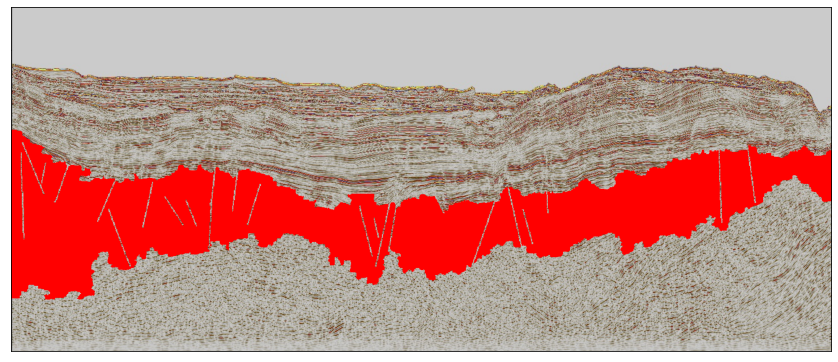

In [192]:
def load_data_label(release):
    dataset = SegmentsDataset(release)
    for sample in dataset:
        label = get_semantic_bitmap(sample['segmentation_bitmap'], sample['annotations'])
        label = np.stack([label==v for v in np.unique(label)], axis=-1)
        data = np.asarray(sample['image']) / 255.
        #converting to grayscale
#         data = 0.2989*data[:,:,0] + 0.5870*data[:,:,1] + 0.1140*data[:,:,2]
#         data = Image.open(data_dir + sample['file_name'])
    label = np.asarray(label)
    return data, label

plt.figure(figsize=(50,50))
for i, rel in enumerate(release):
    
    data, label = load_data_label(rel)
    plot_overlay(data, label[:,:,6], i)
    plt.xticks([])
    plt.yticks([])

Initializing dataset...
Preloading all samples. This may take a while...


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 37.15it/s]

Initialized dataset with 1 images.


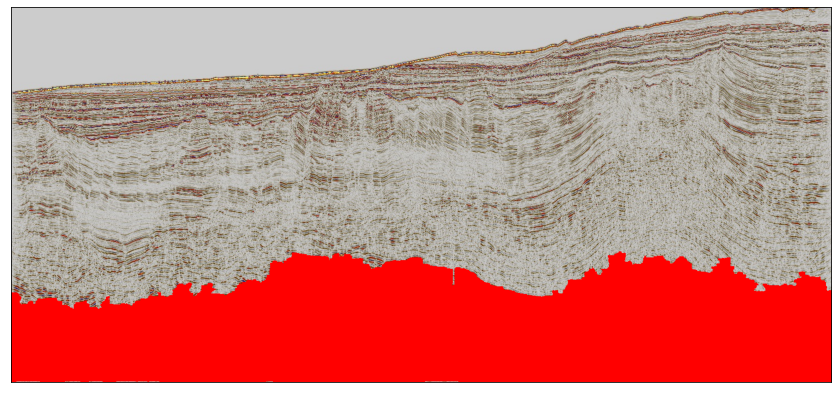

In [63]:
def load_data_label(release):
    dataset = SegmentsDataset(release)
    for sample in dataset:
        label = get_semantic_bitmap(sample['segmentation_bitmap'], sample['annotations'])
        label = np.stack([label==v for v in np.unique(label)], axis=-1)
        data = np.asarray(sample['image']) / 255.
        #converting to grayscale
#         data = 0.2989*data[:,:,0] + 0.5870*data[:,:,1] + 0.1140*data[:,:,2]
#         data = Image.open(data_dir + sample['file_name'])
    label = np.asarray(label)
    return data, label

plt.figure(figsize=(50,50))
for i, rel in enumerate(release):
    
    data, label = load_data_label(rel)
    plot_overlay(data, label[:,:,6], i)
    plt.xticks([])
    plt.yticks([])

In [64]:
def patchify(data, label, size, number, threshold, seg):

    (t_max, x_max, _) = label.shape    
    X = np.zeros((number, size, size, 3))
    Y = np.zeros((number, size, size, 1))
        
    n = 0
    while n < number: 
        x = random.randint(size//2, x_max-size//2)
        t = random.randint(size//2, t_max-size//2)

        if label[t,x,seg]:
            if np.count_nonzero(label[t-size//2:t+size//2, x-size//2:x+size//2]) > threshold:
                X[n,:,:,:]  = data[t-size//2:t+size//2, x-size//2:x+size//2, :]
                Y[n,:,:,0]  = label[t-size//2:t+size//2, x-size//2:x+size//2, 1]
                n = n + 1
    return X, Y

random.seed(110)

# Parameters
size       = 128
threshold  = 0
num_train  = 8000
num_val    = 2000


# Validation data from inline 300
X_val = np.zeros((num_val,size,size,3))
Y_val = np.zeros((num_val,size,size,1))

# seismic, label = load_data_label(release_8)
release_list = [release_8]
starts = [0]
ends = [1504]
seg = [4]

n = 0
for i, release in enumerate(release_list):
    seismic, label = load_data_label(release)
    X_val[n:n+num_val//1,...], Y_val[n:n+num_val//1,...] = patchify(seismic[:,starts[i]:ends[i],:], label[:,starts[i]:ends[i],:], size, num_val//1, threshold, seg[i]) 
    n += num_val//1

# Training data from inlines 100, 200, 400, 500
X_train = np.zeros((num_train,size,size,3))
Y_train = np.zeros((num_train,size,size,1))

starts = [0]
ends = [1504]
seg = [5]

n = 0
for i, release in enumerate(release_list):
    seismic, label = load_data_label(release)
    
    X_train[n:n+num_train//1,...], Y_train[n:n+num_train//1,...] = patchify(seismic[:,starts[i]:ends[i],:], label[:,starts[i]:ends[i],:], size, num_train//1, threshold, seg[i]) 
    n += num_train//1

Initializing dataset...
Preloading all samples. This may take a while...


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 29.58it/s]

Initialized dataset with 1 images.


Initializing dataset...
Preloading all samples. This may take a while...


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 33.45it/s]

Initialized dataset with 1 images.


Before training, it's always a good idea to check the training data, so let's do that:

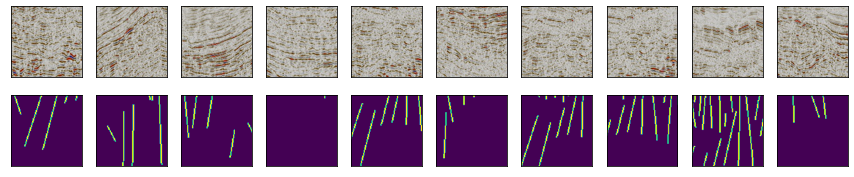

In [51]:
fig, axs = plt.subplots(2, 10, figsize=(15,3))

K = []
for m in range(10):
    k = random.randint(0,4000)
    K.append(k)
    axs[0,m].imshow(X_train[k,:,:,:], interpolation='spline16', cmap=plt.cm.gray, aspect=1)
    axs[0,m].set_xticks([])
    axs[0,m].set_yticks([])

# K = np.stack(K)
for m in range(10):
    axs[1,m].imshow(Y_train[K[m],:,:,0], interpolation='spline16', aspect=1)
    axs[1,m].set_xticks([])
    axs[1,m].set_yticks([])
    k += 1


What do you notice?

* Is it an easy task?
* Could you predict the masks?
* Can we learn more from some examples?

## Training ##
To train our model, we need to define its architecture. 



In [84]:
def down_block(x, filters, kernel_size=(3, 3), padding="same", strides=1):
    c = tf.keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(x)
    c = tf.keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(c)
    p = tf.keras.layers.MaxPool2D((2, 2), (2, 2))(c)
    return c, p

def up_block(x, skip, filters, kernel_size=(3, 3), padding="same", strides=1):
    us = tf.keras.layers.UpSampling2D((2, 2))(x)
    concat = tf.keras.layers.Concatenate()([us, skip])
    c = tf.keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(concat)
    c = tf.keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(c)
    return c

def bottleneck(x, filters, kernel_size=(3, 3), padding="same", strides=1):
    c = tf.keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(x)
    c = tf.keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(c)
    return c

  


def UNet():
  f = [8, 16, 32]
  inputs = tf.keras.layers.Input((size, size, 3))
  
  p0 = inputs
  c1, p1 = down_block(p0, f[0]) #128 -> 64
#   c2, p2 = down_block(p1, f[1]) #64 -> 32
#   c3, p3 = down_block(p2, f[2]) #32 -> 16
  c4, p4 = down_block(p1, f[1]) #16->8
  
  bn = bottleneck(p4, f[2])
  
  u1 = up_block(bn, c4, f[1]) #8 -> 16
#   u2 = up_block(u1, c3, f[2]) #16 -> 32
#   u3 = up_block(u2, c2, f[1]) #32 -> 64
  u4 = up_block(u1, c1, f[0]) #64 -> 128
  
  outputs = tf.keras.layers.Conv2D(1, (1, 1), padding="same", activation="sigmoid")(u4)
  model = tf.keras.models.Model(inputs, outputs)
  return model



size = 128
model = UNet()
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["acc"])
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_52 (Conv2D)             (None, 128, 128, 8)  224         ['input_5[0][0]']                
                                                                                                  
 conv2d_53 (Conv2D)             (None, 128, 128, 8)  584         ['conv2d_52[0][0]']              
                                                                                                  
 max_pooling2d_10 (MaxPooling2D  (None, 64, 64, 8)   0           ['conv2d_53[0][0]']        

# Now you can train your convolutional neural net using the data generator:
##I increased epochs rank!(30 times my model was trained)

In [85]:
from keras.callbacks import CSVLogger
csvlogger = CSVLogger('history_7_Nov_clu_BT.csv', append=True)
history = model.fit(X_train, 
                    Y_train, 
                    validation_data=(X_val, Y_val), 
                    epochs=30,
                    callbacks=[csvlogger])

model.save('checkpoint_tot3_7_Nov_clu_BT')

Epoch 1/30
250/250 [==============================] - 177s 692ms/step - loss: 0.2118 - acc: 0.9494 - val_loss: 0.3339 - val_acc: 0.9003
Epoch 2/30
250/250 [==============================] - 166s 664ms/step - loss: 0.1833 - acc: 0.9525 - val_loss: 0.3314 - val_acc: 0.9003
Epoch 3/30
250/250 [==============================] - 177s 706ms/step - loss: 0.1727 - acc: 0.9526 - val_loss: 0.3520 - val_acc: 0.9003
Epoch 4/30
250/250 [==============================] - 174s 698ms/step - loss: 0.1571 - acc: 0.9535 - val_loss: 0.3882 - val_acc: 0.9000
Epoch 5/30
250/250 [==============================] - 173s 692ms/step - loss: 0.1401 - acc: 0.9561 - val_loss: 0.3857 - val_acc: 0.8977
Epoch 6/30
250/250 [==============================] - 174s 695ms/step - loss: 0.1244 - acc: 0.9590 - val_loss: 0.4305 - val_acc: 0.8985
Epoch 7/30
250/250 [==============================] - 173s 693ms/step - loss: 0.1100 - acc: 0.9622 - val_loss: 0.4133 - val_acc: 0.8977
Epoch 8/30
250/250 [============================

INFO:tensorflow:Assets written to: checkpoint_tot3_7_Nov_clu_BT\assets


INFO:tensorflow:Assets written to: checkpoint_tot3_7_Nov_clu_BT\assets


To visualize our training, you can plot learning curves:

In [87]:
model.load_weights('checkpoint_tot3_7_Nov_clu_BT')

In [89]:
import pandas as pd
history = pd.read_csv('history_7_Nov_clu_BT.csv')

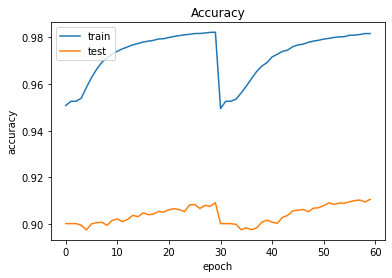

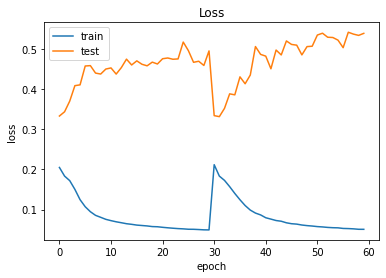

In [90]:
plt.plot(history['acc'])
plt.plot(history['val_acc'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [92]:
from keras import backend as K

def F1_score(y_true, y_pred, smooth=1):
    intersection = K.sum(y_true * y_pred, axis=[1,2,3])
    union = K.sum(y_true, axis=[1,2,3]) + K.sum(y_pred, axis=[1,2,3])
    dice = K.mean((2. * intersection + smooth)/(union + smooth), axis=0)
    return dice

In [93]:
y_pred = model.predict(X_val)
Y_pred = 1. * (y_pred>0.5)
Y_true = Y_val

print(F1_score(Y_true, Y_pred).numpy())


63/63 [==============================] - 7s 117ms/step
0.3425644564689067


and a confusion matrix:

In [94]:
from sklearn.metrics import confusion_matrix

Y_pred = model.predict(X_val)
Y_true = Y_val    

cm = np.zeros((2,2))

for n in range(Y_true.shape[0]):

  y_true = Y_true[n,:,:,0].round().flatten()
  y_pred = Y_pred[n,:,:,0].round().flatten()

  cm_batch = confusion_matrix(y_true, y_pred)
              

  cm = cm + cm_batch

63/63 [==============================] - 7s 116ms/step


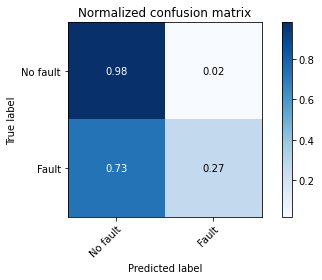

In [95]:
cmap=plt.cm.Blues
normalize = True

title = 'Normalized confusion matrix'


# Only use the labels that appear in the data
classes = ['No fault','Fault']

# Normalize
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


fig, ax = plt.subplots()
im = ax.imshow(cm_norm, interpolation='nearest', cmap=cmap)
ax.figure.colorbar(im, ax=ax)
# We want to show all ticks...
ax.set(xticks=np.arange(cm_norm.shape[1]),
       yticks=np.arange(cm_norm.shape[0]),
       # ... and label them with the respective list entries
       xticklabels=classes, yticklabels=classes,
       title=title,
       ylabel='True label',
       xlabel='Predicted label')

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
fmt = '.2f' if normalize else 'd'
thresh = cm_norm.max() / 2.
for i in range(cm_norm.shape[0]):
    for j in range(cm_norm.shape[1]):
        ax.text(j, i, format(cm_norm[i, j], fmt),
                ha="center", va='center',
                color="white" if cm_norm[i, j] > thresh else "black")
fig.tight_layout()

## Application##
Now we can apply our model to the entire image to see how well it has learned to recognize salt structures in our seismic image:

In [193]:
def tile(data, label, wsize, dt, dx, seg):
    
    (t_max, x_max, _) = data.shape    
    
    n_patch = (t_max//dt+1)*(x_max//dx+1)
    data_patch = np.zeros((n_patch,wsize,wsize,3)) 

    n = 0
    T = []
    N = []
    for t in range(0, t_max, dt):
        for x in range(0, x_max, dx):  
            if label[t,x,seg]:
                T.append([t,x])

                if t_max - t < wsize and x_max - x < wsize:
                    data_patch[n,:,:,:] = data[t_max-wsize:t_max, x_max-wsize:x_max,:3]
                elif x_max - x < wsize:
                    data_patch[n,:,:,:] = data[t:t+wsize, x_max-wsize:x_max,:3]
                elif t_max - t < wsize:
                    data_patch[n,:,:,:] = data[t_max-wsize:t_max, x:x+wsize,:3]
                else:
                    data_patch[n,:,:,:] = data[t:t+wsize,x:x+wsize, :3]  
                N.append(n)
            n = n + 1

    return data_patch, T, N




def merge(data_patch, t_max, x_max, wsize, dt, dx, T, N):

    data_new = np.zeros((t_max, x_max,3))
    count = np.zeros((t_max, x_max, 1))
    
    n = 0
    for t,x in T:

            if t_max - t < wsize and x_max - x < wsize:
                data_new[t_max-wsize:t_max, x_max-wsize:x_max,:] += data_patch[N[n],:,:,:]
                count[t_max-wsize:t_max, x_max-wsize:x_max,0] += 1
            elif x_max - x < wsize:
                data_new[t:t+wsize, x_max-wsize:x_max,:] += data_patch[N[n],:,:,:]
                count[t:t+wsize, x_max-wsize:x_max,0] += 1 
            elif t_max - t < wsize:
                data_new[t_max-wsize:t_max, x:x+wsize,:] += data_patch[N[n],:,:,:]
                count[t_max-wsize:t_max, x:x+wsize,0] += 1
            else:
                data_new[t:t+wsize,x:x+wsize,:] += data_patch[N[n],:,:,:]
                count[t:t+wsize,x:x+wsize,0] += 1 

            n = n + 1

    return data_new/count

def plot_overlay(image, label, i):
    (tmax, xmax) = np.shape(label)

    label_rgb = np.zeros((tmax,xmax,4), 'uint8')
    label_rgb[:,:,0] = 255
    label_rgb[:,:,1] = 255 - 255*label
    label_rgb[:,:,2] = 255 - 255*label
    label_rgb[:,:,3] = 255*label   
    
    img = Image.fromarray(label_rgb, mode='RGBA')
    
    image_rgb = np.zeros((tmax,xmax,4), 'uint8')    
    image_rgb[:,:,0] = 255*image[:,:,0]
    image_rgb[:,:,1] = 255*image[:,:,1]
    image_rgb[:,:,2] = 255*image[:,:,2]
#     image_rgb[:,:,0:3] = 255. * image
    image_rgb[:,:,3] = 255
    
    background = Image.fromarray(image_rgb, mode='RGBA') 
    background.paste(img, (0, 0), img)

#     background = Image.fromarray(image_rgb, mode='RGBA') 
#     print(image.shape)
#     print(label.shape)
#     background.paste(label, (0, 0), label)

    plt.subplot(1,5,i+1).imshow(background)
    plt.xticks([])
    plt.yticks([])



Initializing dataset...
Preloading all samples. This may take a while...


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 40.52it/s]

Initialized dataset with 1 images.



C:\Users\azadk\AppData\Local\Temp/ipykernel_22700/3219013673.py:55: RuntimeWarning: invalid value encountered in true_divide
  return data_new/count


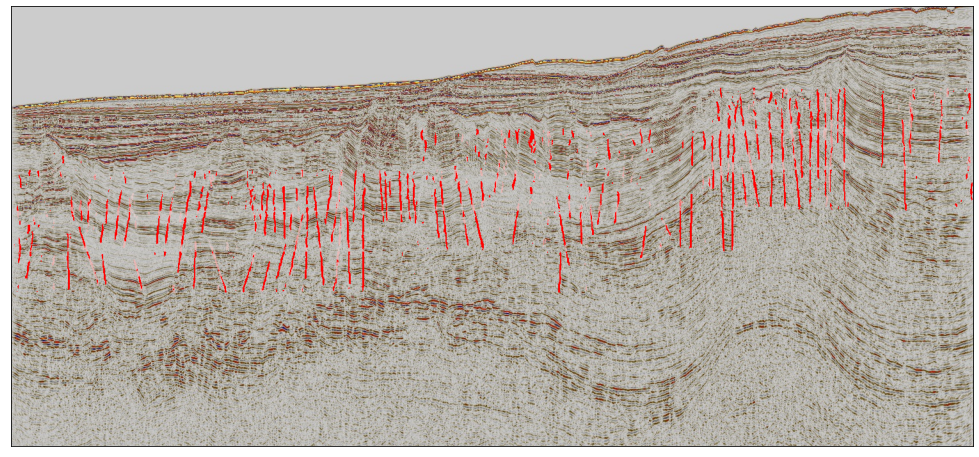

In [206]:
dt = 64
dx = 64

data, label = load_data_label(release_8)
# data = data[:700, :800]
# lable = label[:700, :800]
(t_max, x_max, _) = data.shape

plt.figure(figsize=(100,40))
seg = 4
    
for i in range(1): 
    data_tiles, T, N   = tile(data, label, size, dt, dx,seg)
    result_tiles = 1.*(model.predict_on_batch(data_tiles)>0.35)
    result       = merge(result_tiles, t_max, x_max, size, dt, dx, T, N)
    plot_overlay(data, result[:,:,0],i)
    plt.xticks([])
    plt.yticks([])

Initializing dataset...
Preloading all samples. This may take a while...


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 45.60it/s]

Initialized dataset with 1 images.



C:\Users\azadk\AppData\Local\Temp/ipykernel_22700/3219013673.py:55: RuntimeWarning: invalid value encountered in true_divide
  return data_new/count


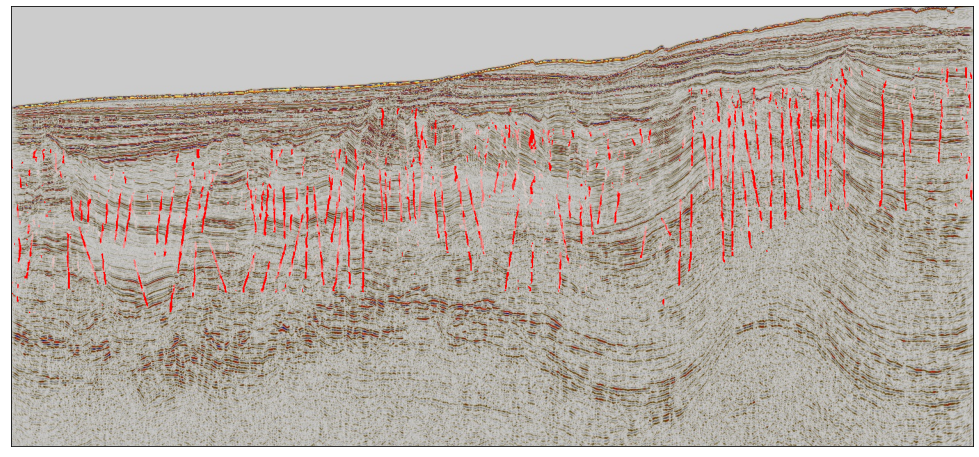

In [208]:
dt = 32
dx = 32

data, label = load_data_label(release_8)
# data = data[:700, :800]
# lable = label[:700, :800]
(t_max, x_max, _) = data.shape

plt.figure(figsize=(100,40))
seg = 4
    
for i in range(1): 
    data_tiles, T, N   = tile(data, label, size, dt, dx,seg)
    result_tiles = 1.*(model.predict_on_batch(data_tiles)>0.25)
    result       = merge(result_tiles, t_max, x_max, size, dt, dx, T, N)
    plot_overlay(data, result[:,:,0],i)
    plt.xticks([])
    plt.yticks([])

In [ ]:
dt = 16
dx = 16

data, label = load_data_label(release_4)
# data = data[:700, :800]
# lable = label[:700, :800]
(t_max, x_max, _) = data.shape

plt.figure(figsize=(100,40))
seg = 6
    
for i in range(1): 
    data_tiles, T, N   = tile(data, label, size, dt, dx,seg)
    result_tiles = 1.*(model.predict_on_batch(data_tiles)>0.25)
    result       = merge(result_tiles, t_max, x_max, size, dt, dx, T, N)
    plot_overlay(data, result[:,:,0],i)
    plt.xticks([])
    plt.yticks([])

Initializing dataset...
Preloading all samples. This may take a while...


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 47.77it/s]

Initialized dataset with 1 images.


In [176]:
def tile(data, wsize, dt, dx):
    
    (t_max, x_max, _) = data.shape    
    
    n_patch = (t_max//dt+1)*(x_max//dx+1)
    data_patch = np.zeros((n_patch,wsize,wsize,3)) 

    n = 0

    for t in range(0, t_max, dt):
        for x in range(0, x_max, dx):  
                if t_max - t < wsize and x_max - x < wsize:
                    data_patch[n,:,:,:] = data[t_max-wsize:t_max, x_max-wsize:x_max,:3]
                elif x_max - x < wsize:
                    data_patch[n,:,:,:] = data[t:t+wsize, x_max-wsize:x_max,:3]
                elif t_max - t < wsize:
                    data_patch[n,:,:,:] = data[t_max-wsize:t_max, x:x+wsize,:3]
                else:
                    data_patch[n,:,:,:] = data[t:t+wsize,x:x+wsize, :3]  
                n = n + 1

    return data_patch


def merge(data_patch, t_max, x_max, wsize, dt, dx):

    data_new = np.zeros((t_max, x_max,3))
    count = np.zeros((t_max, x_max, 1))
    
    n = 0
    for t in range(0, t_max, dt):
        for x in range(0, x_max, dx):
            if t_max - t < wsize and x_max - x < wsize:
                data_new[t_max-wsize:t_max, x_max-wsize:x_max,:] += data_patch[n, :,:,:]
                count[t_max-wsize:t_max, x_max-wsize:x_max,0] += 1
            elif x_max - x < wsize:
                data_new[t:t+wsize, x_max-wsize:x_max,:] += data_patch[n,:,:,:]
                count[t:t+wsize, x_max-wsize:x_max,0] += 1 
            elif t_max - t < wsize:
                data_new[t_max-wsize:t_max, x:x+wsize,:] += data_patch[n,:,:,:]
                count[t_max-wsize:t_max, x:x+wsize,0] += 1
            else:
                data_new[t:t+wsize,x:x+wsize,:] += data_patch[n,:,:,:]
                count[t:t+wsize,x:x+wsize,0] += 1 

            n = n + 1

    return data_new/count

def plot_overlay(image, label, i):
    (tmax, xmax) = np.shape(label)

    label_rgb = np.zeros((tmax,xmax,4), 'uint8')
    label_rgb[:,:,0] = 255
    label_rgb[:,:,1] = 255 - 255*label
    label_rgb[:,:,2] = 255 - 255*label
    label_rgb[:,:,3] = 255*label   
    
    img = Image.fromarray(label_rgb, mode='RGBA')
    
    image_rgb = np.zeros((tmax,xmax,4), 'uint8')    
    image_rgb[:,:,0] = 255*image[:,:,0]
    image_rgb[:,:,1] = 255*image[:,:,1]
    image_rgb[:,:,2] = 255*image[:,:,2]
#     image_rgb[:,:,0:3] = 255. * image
    image_rgb[:,:,3] = 255
    
    background = Image.fromarray(image_rgb, mode='RGBA') 
    background.paste(img, (0, 0), img)

#     background = Image.fromarray(image_rgb, mode='RGBA') 
#     print(image.shape)
#     print(label.shape)
#     background.paste(label, (0, 0), label)

    plt.subplot(1,5,i+1).imshow(background)
    plt.xticks([])
    plt.yticks([])



Initializing dataset...
Preloading all samples. This may take a while...


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 45.61it/s]

Initialized dataset with 1 images.


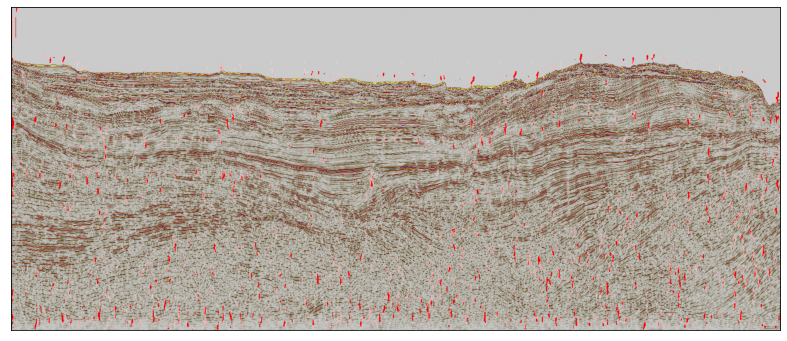

In [180]:
dt = 64
dx = 64

data, label = load_data_label(release_4)
# data = data[:700, :800]
# lable = label[:700, :800]
(t_max, x_max, _) = data.shape

plt.figure(figsize=(80,20))
    
for i in range(1): 
    data_tiles   = tile(data, size, dt, dx)
    result_tiles = 1.*(model.predict_on_batch(data_tiles)>0.3)
    result       = merge(result_tiles, t_max, x_max, size, dt, dx)
        
    plot_overlay(data, result[:,:,0],i)
    plt.xticks([])
    plt.yticks([])

Initializing dataset...
Preloading all samples. This may take a while...


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 38.61it/s]

Initialized dataset with 1 images.


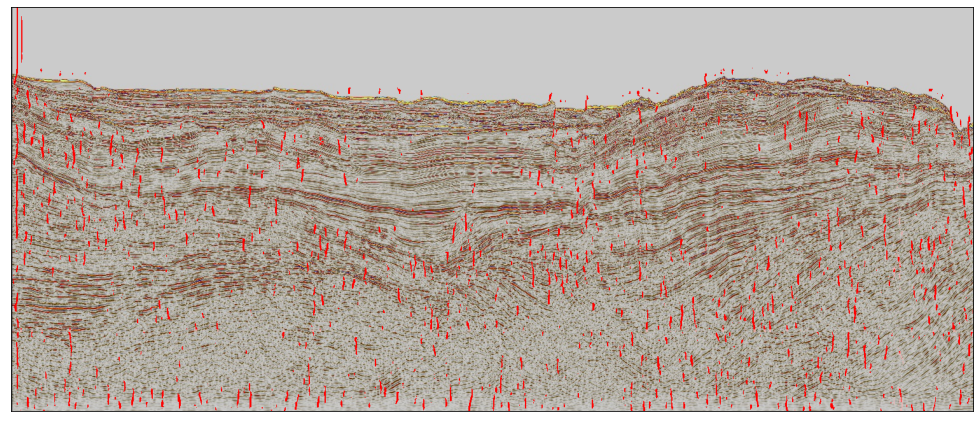

In [42]:
dt = 128
dx = 128
data, label = load_data_label(release_4)
(t_max, x_max, _) = data.shape

plt.figure(figsize=(100,40))
    
for i in range(1): 
    data_tiles   = tile(data[:,:,0:3], size, dt, dx)
    result_tiles = 1.*(model.predict_on_batch(data_tiles)>0.4)
    result       = merge(result_tiles, t_max, x_max, size, dt, dx)
    plot_overlay(data, result[:,:,0], i)
    plt.xticks([])
    plt.yticks([])

Initializing dataset...
Preloading all samples. This may take a while...


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 43.61it/s]

Initialized dataset with 1 images.


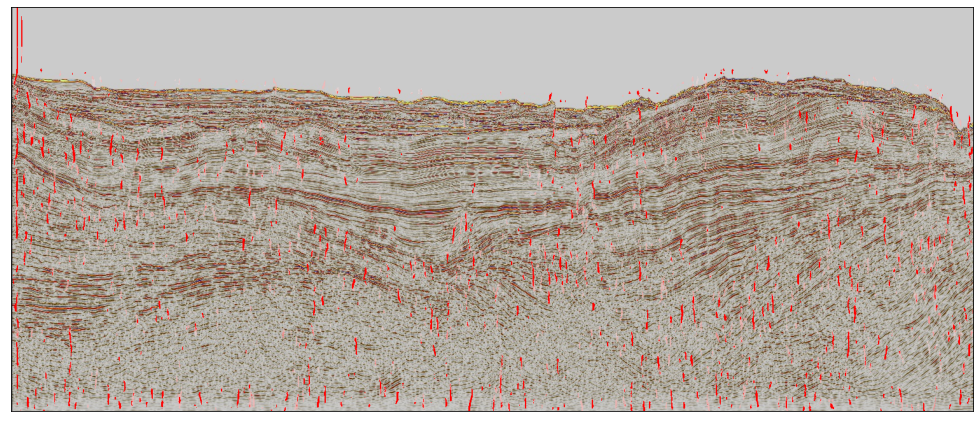

In [43]:
dt = 64
dx = 64
data, label = load_data_label(release_4)
(t_max, x_max, _) = data.shape

plt.figure(figsize=(100,40))
    
for i in range(1): 
    data_tiles   = tile(data[:,:,0:3], size, dt, dx)
    result_tiles = 1.*(model.predict_on_batch(data_tiles)>0.4)
    result       = merge(result_tiles, t_max, x_max, size, dt, dx)
    plot_overlay(data, result[:,:,0], i)
    plt.xticks([])
    plt.yticks([])

### the faults that I have labeled

Not too bad for a first try! Check inline 300, which shows our predictions on a seismic line that it has not seen before. The model is able to find some of the clearer faults (bottom left) in the image. That's promising! Maybe we can even map these faults in a horizontal slice through the volume:

Now let's predict! Again it will take a moment, since we have to process quite a bit of the volume